# Q1. Contrast Stretching

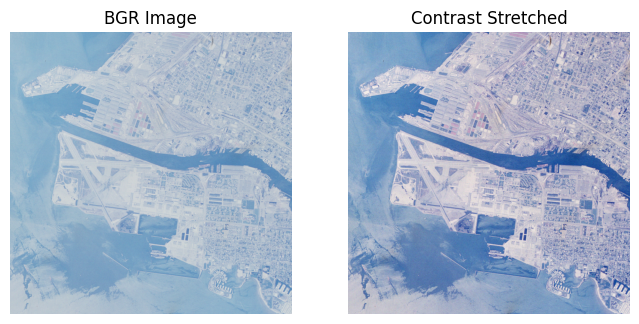

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load file
file = 'Oakland.png'
img_bgr = cv2.imread(file)

# Get height and h,w
min = 0
max = 255
(h, w, chan) = img_bgr.shape

# Method 1
# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - np.min(b)) / (np.max(b) - np.min(b))) * (max - min) + min
stretched_g = ((g - np.min(g)) / (np.max(g) - np.min(g))) * (max - min) + min
stretched_r = ((r - np.min(r)) / (np.max(r) - np.min(r))) * (max - min) + min


img_1 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_1 = img_1.astype(np.uint8)
cv2.imwrite("OaklandBGRstretched.png",img_1)


################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('BGR Image')
ax1.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()

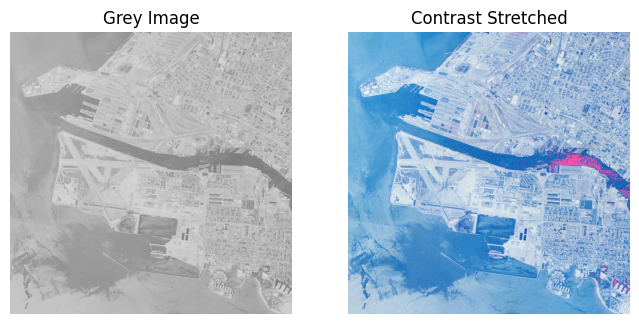

In [17]:
# Method 2 - Convert Image to hsvscale
img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
cv2.imwrite("OaklandGrey.png", img_grey)

grey_min = np.min(img_grey)
grey_max = np.max(img_grey)

stretched_grey = ((img_grey - grey_min) / (grey_max - grey_min)) * (max - min) + min



# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = np.clip(((b - grey_min) / (grey_max - grey_min)) * (max - min) + min,0,255)
stretched_g = np.clip(((g - grey_min) / (grey_max - grey_min)) * (max - min) + min,0,255)
stretched_r = np.clip(((r - grey_min) / (grey_max - grey_min)) * (max - min) + min,0,255)

img_2 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_2 = img_2.astype(np.uint8)
cv2.imwrite("OaklandGreyStretched.png",img_2)
################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('Grey Image')
ax1.imshow(cv2.cvtColor(img_grey, cv2.COLOR_GRAY2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()


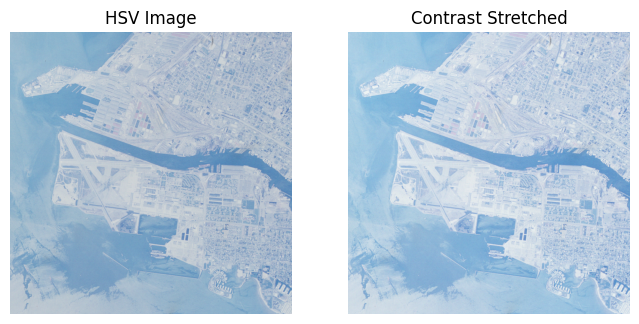

In [18]:
# Method 3 
# Convert BGR to HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

hsv_min = np.min(img_hsv)
hsv_max = np.max(img_hsv)

stretched_hsv = ((img_hsv - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min



# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min
stretched_g = ((g - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min
stretched_r = ((r - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min

img_3 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_3 = img_3.astype(np.uint8)
cv2.imwrite("OaklandHsvStretched.png",img_3)

################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('HSV Image')
ax1.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()

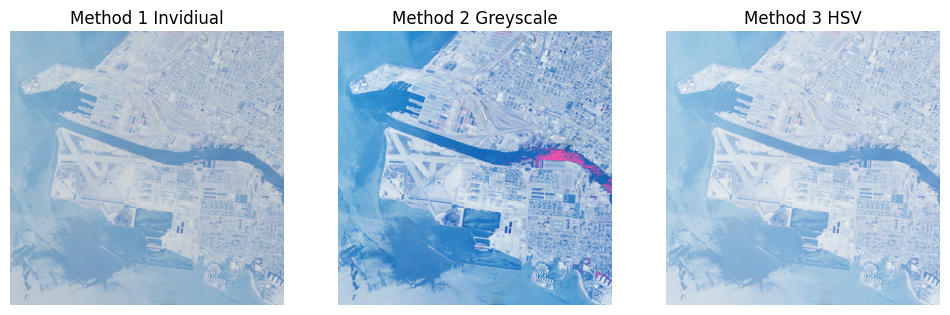

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.set_title('Method 1 Invidiual')
ax1.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

# Display the new image
ax2.set_title('Method 2 Greyscale')
ax2.imshow(cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB))

# Display the new image
ax3.set_title('Method 3 HSV')
ax3.imshow(cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB))

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

The RGB contrast difference worked the best as it takes into account the lack of contrast in each channel and then ideally stretches the contrast as much as possible within the 255 colour bounds which creates a greater contrasted image without losing details due to "clipping".

Qualitatively greyscale is second the best because the buildings in the greyscale image are not that contrasted. Thus the contrast stretching clearly creates a stronger contrast in that region which may be more ideal for this use case. However there is a loss of information data in thecentnre

The HSV contrast stretching for hsv is not as clear as there is already a high level of intensity variation and applying the same algorithm to all three channels does not yield a very cotrasted result.

# Q2
Write an algorithm that computes and plots the histogram of an image and
also reports the minimum pixel value and the maximum pixel value in the image. Then execute
your algorithm to compare the histograms and extreme values before and after contrast
stretching of image Oakland.png for each of the three approaches in the previous task.

More specifically, for the first contrast-stretching approach, show the histogram and extreme
values for each of the three channels (R, G, B) of both the input image and the output image.
For the second approach, show the histogram and extreme values of only the gray value
representation (Y) of both the input image and the output image after conversion. For the
third approach, show the histogram and extreme values of only the value channel (V) of both
the input image and the output image after conversion.
To facilitate visual comparison, present the histograms of the input image and corresponding
output image side by side in each case.

Original (BGR)
Min:113
Max:231
Min:96
Max:230
Min:70
Max:222
Stretched (BGR)
Min:0
Max:255
Min:0
Max:255
Min:0
Max:255


(0.0, 256.0)

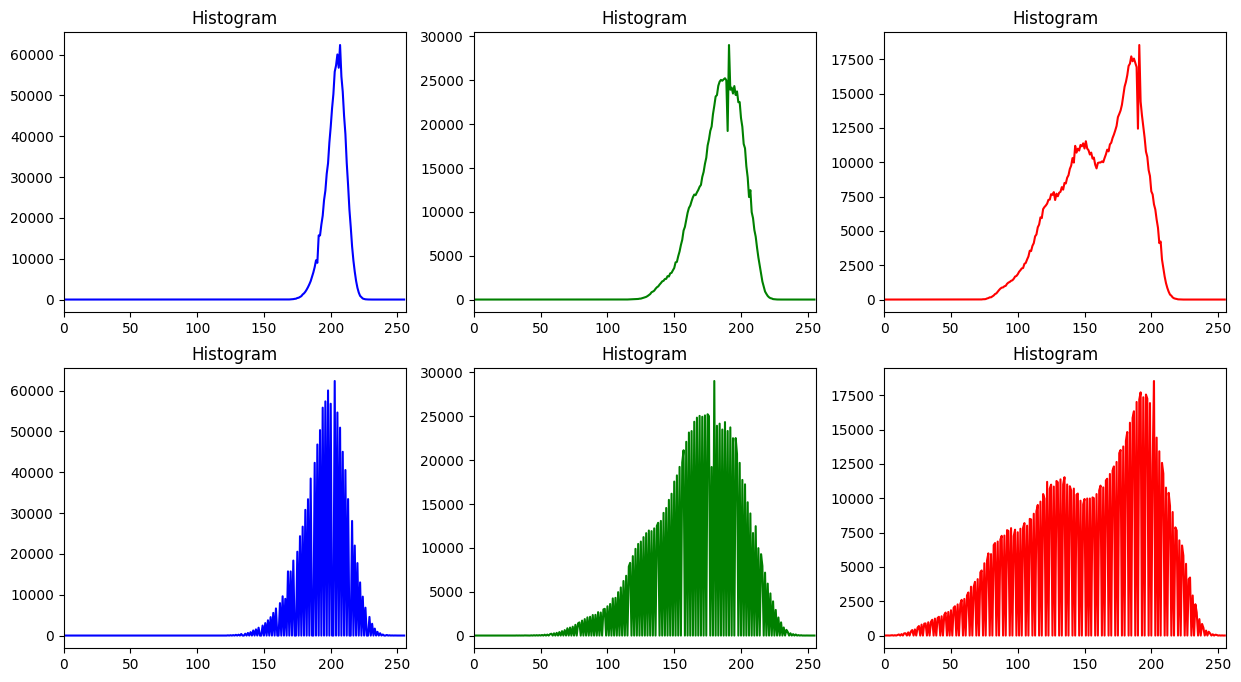

In [20]:
# Approach 1 RGB
def getHistogram(img):
    histogram = np.zeros((256), dtype=int)
    #print(histogram)

    for row in img:
        for pixel_value in row:
            histogram[pixel_value] += 1

    reportMinMax(histogram)
    
    return histogram
    
def reportMinMax(hist):
    # Find the indices of non-zero elements
    non_zero_indices = np.nonzero(hist)

    # Find the index of the lowest non-zero element
    min = non_zero_indices[0].min()

    # Find the index of the highest non-zero element
    max=  non_zero_indices[0].max()

    print("Min:" + str(min))
    print("Max:" + str(max))

file = 'Oakland.png'
img_bgr = cv2.imread(file)
file2 = 'OaklandBGRStretched.png'
img_bgr_stretched = cv2.imread(file2)

b, g, r = cv2.split(img_bgr)
bs,gs,rs = cv2.split(img_bgr_stretched)

print("Original (BGR)")
h1 = getHistogram(b)
h2 = getHistogram(g)
h3 = getHistogram(r)
print("Stretched (BGR)")
h4 = getHistogram(bs)
h5 = getHistogram(gs)
h6 = getHistogram(rs)


fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot the histogram in the first subplot
axes[0,0].set_title('Histogram')
axes[0,0].plot(h1, color='blue')
axes[0,0].set_xlim([0, 256])

# Plot the histogram in the second subplot
axes[0,1].set_title('Histogram')
axes[0,1].plot(h2, color='green')
axes[0,1].set_xlim([0, 256])

# Plot the histogram in the first subplot
axes[0,2].set_title('Histogram')
axes[0,2].plot(h3, color='red')
axes[0,2].set_xlim([0, 256])

# Plot the histogram in the second subplot
axes[1,0].set_title('Histogram')
axes[1,0].plot(h4, color='blue')
axes[1,0].set_xlim([0, 256])
# Plot the histogram in the first subplot
axes[1,1].set_title('Histogram')
axes[1,1].plot(h5, color='green')
axes[1,1].set_xlim([0, 256])

# Plot the histogram in the second subplot
axes[1,2].set_title('Histogram')
axes[1,2].plot(h6, color='red')
axes[1,2].set_xlim([0, 256])


Min:92
Max:225
Min:43
Max:252
Original
Min:92
Max:225
Stretched
Min:43
Max:252


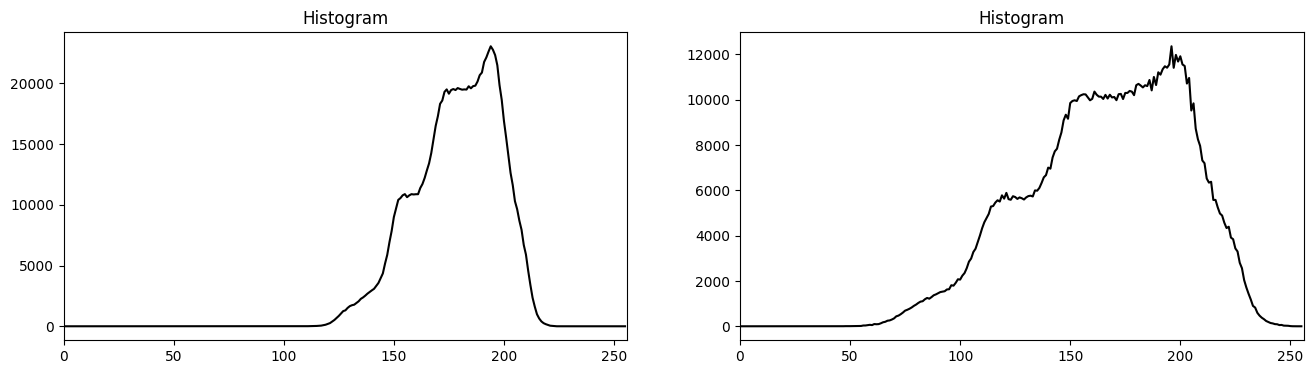

In [21]:
# Approach 2 Grey

# Load file
file = 'Oakland.png'
img_grey = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
file2 = 'OaklandGreyStretched.png'
img_grey_stretched = cv2.imread(file2,cv2.IMREAD_GRAYSCALE)

histogramOld = getHistogram(img_grey)
histogramNew = getHistogram(img_grey_stretched)

print("Original")
reportMinMax(histogramOld)
print("Stretched")
reportMinMax(histogramNew)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the histogram in the first subplot
ax1.set_title('Histogram')
ax1.plot(histogramOld, color='black')
ax1.set_xlim([0, 256])

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(histogramNew, color='black')
ax2.set_xlim([0, 256])

plt.show()



Min:113
Max:231
Min:74
Max:255
Original
Min:113
Max:231
Stretched
Min:74
Max:255


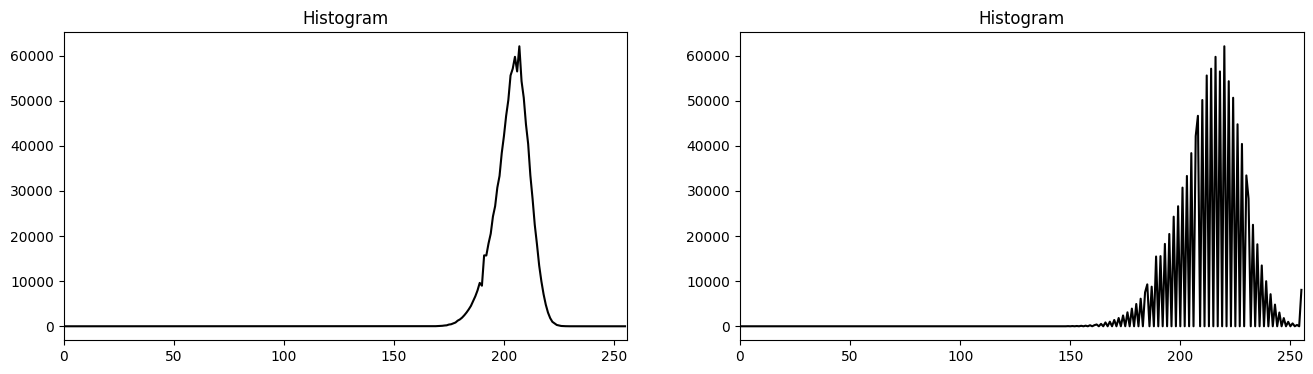

In [22]:
# Approach 3 HSV    
# Load file
file = 'Oakland.png'
img_bgr = cv2.imread(file)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_hsv = img_hsv[:, :, 2] 
file2 = 'OaklandGreyStretched.png'
img_bgr_stretched = cv2.imread(file2)
img_hsv_stretched = cv2.cvtColor(img_bgr_stretched, cv2.COLOR_BGR2HSV)
img_hsv_stretched = img_hsv_stretched[:, :, 2] 

histogramOld = getHistogram(img_hsv)
histogramNew = getHistogram(img_hsv_stretched)

print("Original")
reportMinMax(histogramOld)
print("Stretched")
reportMinMax(histogramNew)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the histogram in the first subplot
ax1.set_title('Histogram')
ax1.plot(histogramOld, color='black')
ax1.set_xlim([0, 256])

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(histogramNew, color='black')
ax2.set_xlim([0, 256])

plt.show()



# Q3 Image Thresholding
If value is above, it is object
If it is below or equal, it is background


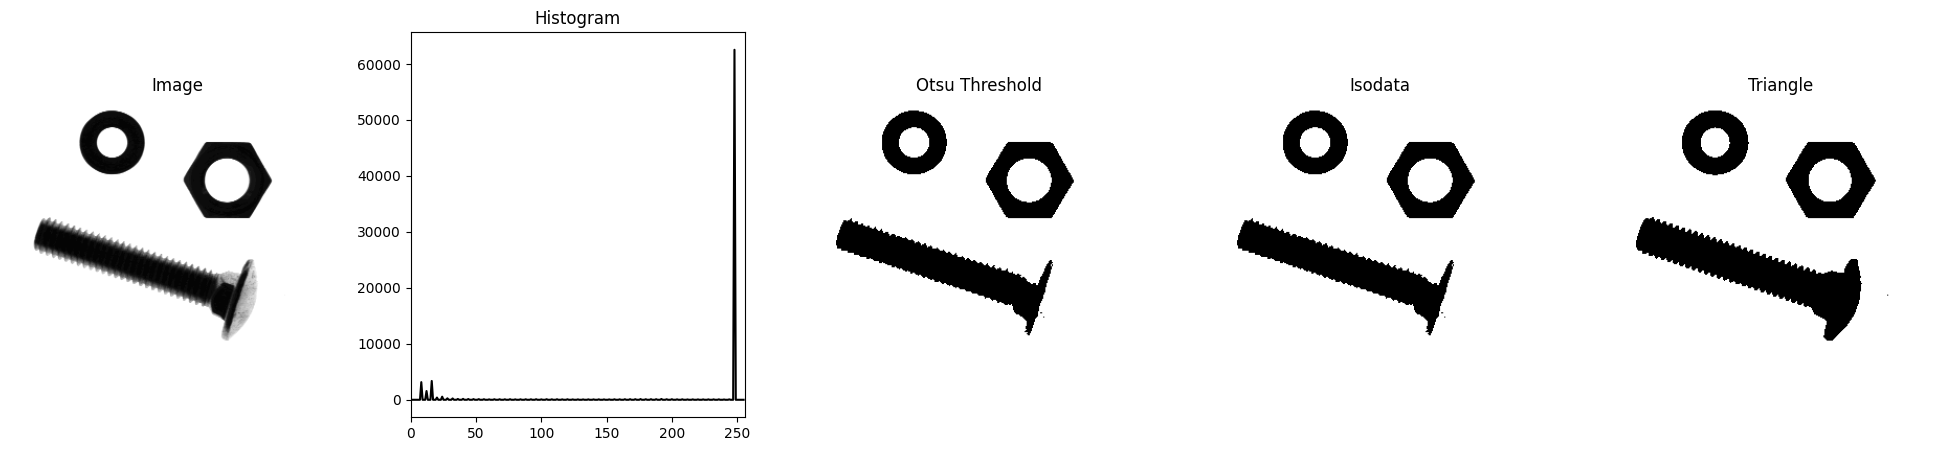

In [23]:
# Hardware image    
img = cv2.imread("Hardware.png", cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    # print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

### Triangle method
_, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(th3, cmap='gray')
ax5.axis('off')


plt.show()



C:\Users\shady\AppData\Local\Temp\ipykernel_34632\2119788431.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histMaxY = int(hist[histMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_34632\2119788431.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  greyMaxY = int(hist[greyMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_34632\2119788431.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p3 = np.array([i,int(hist[i])])


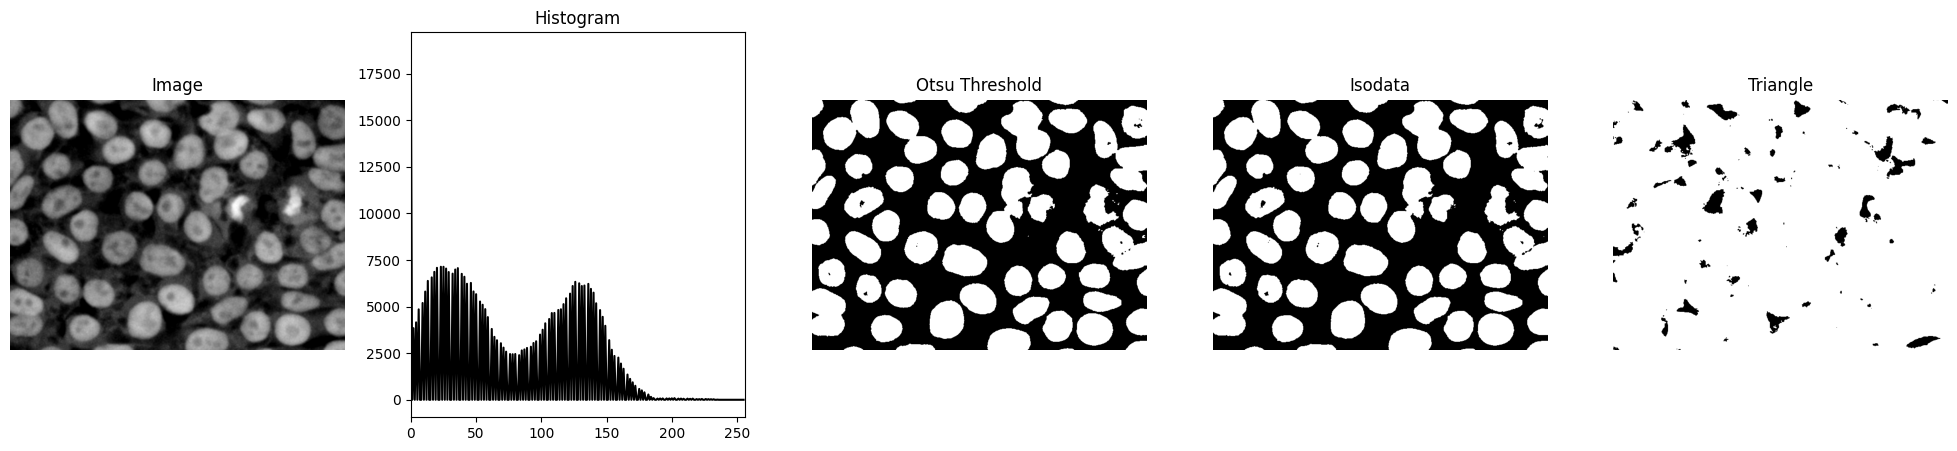

In [24]:
# Nuclei
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)
# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    # print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

### Triangle method
## Find max position of histogram
histMaxX = int(hist.argmax())
histMaxY = int(hist[histMaxX])
p1 = np.array([histMaxX,histMaxY])

## find highest grey value
# Find the indices (bins) where the highest non-zero values occur
non_zero_indices = np.where(hist > 0)
# Find the bin with the highest non-zero value
greyMaxX = 0
for idx, val in np.ndenumerate(hist):
    #print("idx: " + str(idx) + " val: " +  str(int(val)))
    if int(val) > 0:
        greyMaxX = idx[0]
#print(greyMaxX)
greyMaxY = int(hist[greyMaxX])
p2 = np.array([greyMaxX,greyMaxY])

# draw the line and get an array
# Calculate the slope (m) and y-intercept (b) of the line
m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m * p1[0]

# Create an array of length 256 and initialize with zeros
line_array = np.zeros(256, dtype=int)

# Calculate the corresponding y-values and assign them to the array
x_values = np.arange(256)
valid_indices = (x_values >= p1[0]) & (x_values <= p2[0])
line_array[valid_indices] = (m * x_values[valid_indices] + b).astype(int)

# find longest height distance between line and grey value
dist = 0
t_tri = 0
for i in range(histMaxX+1,greyMaxX-1):
    p3 = np.array([i,int(hist[i])])
    d = line_array[i] - p3[1]
    #print(str(d) + str(p1) + str(p2) + str(p3))
    if (d > dist):
        t_tri = i
        dist = d

# print(p1)
# print(p2)
#print('dist = ' + str(dist) + ' at: ' + str(t_tri))
ret3,th3 = cv2.threshold(img,int(t_tri),255,cv2.THRESH_BINARY)

#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(th3, cmap='gray')
ax5.axis('off')


plt.show()



C:\Users\shady\AppData\Local\Temp\ipykernel_34632\2735711239.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histMaxY = int(hist[histMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_34632\2735711239.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  greyMaxY = int(hist[greyMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_34632\2735711239.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p3 = np.array([i,int(hist[i])])


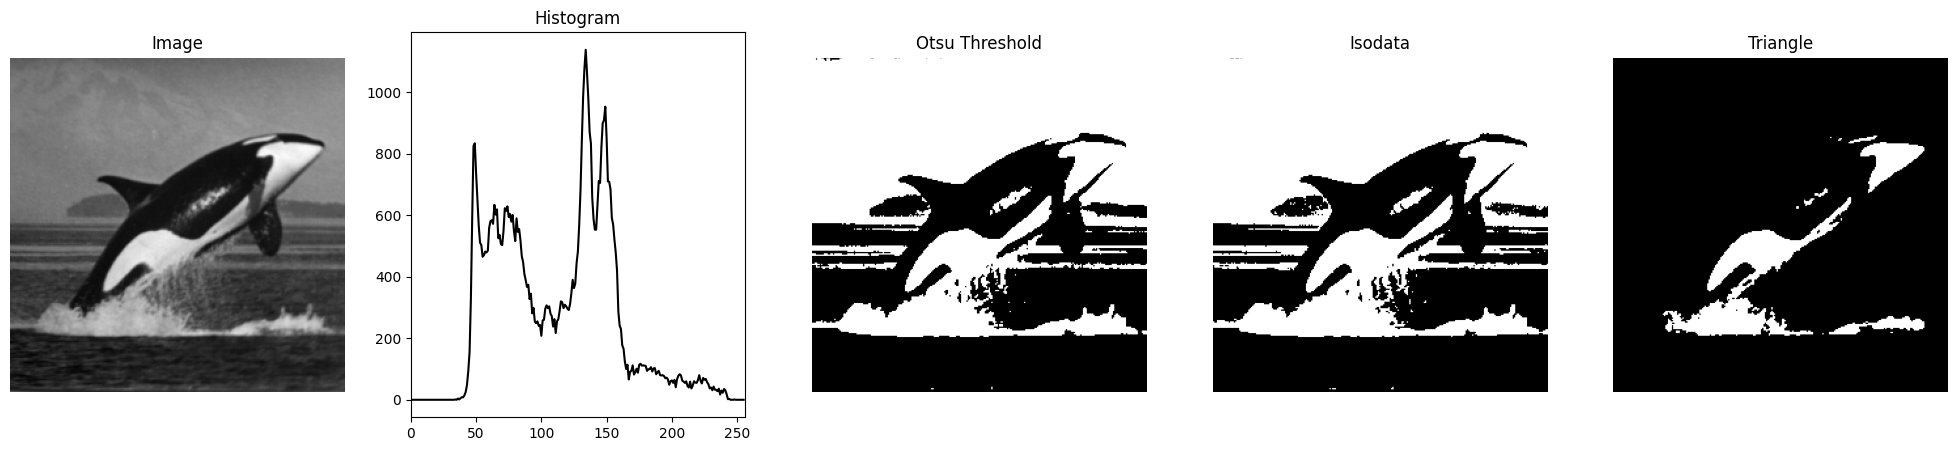

In [25]:
#Orca
img = cv2.imread("Orca.png", cv2.IMREAD_GRAYSCALE)
# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    # print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

### Triangle method
## Find max position of histogram
histMaxX = int(hist.argmax())
histMaxY = int(hist[histMaxX])
p1 = np.array([histMaxX,histMaxY])

## find highest grey value
# Find the indices (bins) where the highest non-zero values occur
non_zero_indices = np.where(hist > 0)
# Find the bin with the highest non-zero value
greyMaxX = 0
for idx, val in np.ndenumerate(hist):
    #print("idx: " + str(idx) + " val: " +  str(int(val)))
    if int(val) > 0:
        greyMaxX = idx[0]
#print(greyMaxX)
greyMaxY = int(hist[greyMaxX])
p2 = np.array([greyMaxX,greyMaxY])

# draw the line and get an array
# Calculate the slope (m) and y-intercept (b) of the line
m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m * p1[0]

# Create an array of length 256 and initialize with zeros
line_array = np.zeros(256, dtype=int)

# Calculate the corresponding y-values and assign them to the array
x_values = np.arange(256)
valid_indices = (x_values >= p1[0]) & (x_values <= p2[0])
line_array[valid_indices] = (m * x_values[valid_indices] + b).astype(int)

# find longest height distance between line and grey value
dist = 0
t_tri = 0
for i in range(histMaxX+1,greyMaxX-1):
    p3 = np.array([i,int(hist[i])])
    d = line_array[i] - p3[1]
    #print(str(d) + str(p1) + str(p2) + str(p3))
    if (d > dist):
        t_tri = i
        dist = d

# print(p1)
# print(p2)
#print('dist = ' + str(dist) + ' at: ' + str(t_tri))
ret3,th3 = cv2.threshold(img,int(t_tri),255,cv2.THRESH_BINARY)

#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(th3, cmap='gray')
ax5.axis('off')


plt.show()




Otsu's method provides good seperation of classes for all the data sets. In Hardware, the nuts and bolts are clearly seperated from the backgound. Although it is an example of extreme contrast Otsu accels in seperating the background and the foreground. Unfortunately it mistakes some of the head of the bolt due to low contrast different. In situations where there is a bimodal such as Orca and Nuclei, Otsu also does a good job of seperating the foreground and background. Otsu may struggle a little in areas with gradients and detailed images however the datasets here show multi-modal peaks and good contrast to begin with

The iso-data method similarly excels in multimodal images and images with a clear background seperations to the forground.

The triangle method did exceptionally well in the hardware image likely due to the fact the algorithm will select a value that accepts almost all the values in an extreme single modal peak scenario. It however failed in the bimodal scenario due to the inability to select a threshold that considers both peaks. It however fairs a bit better in the Orca as it selects the second peak to threshold against which in this particular image is of a higher amplitude.

# Q4 Computing laplacian edge

(-0.5, 745.5, 1199.5, -0.5)

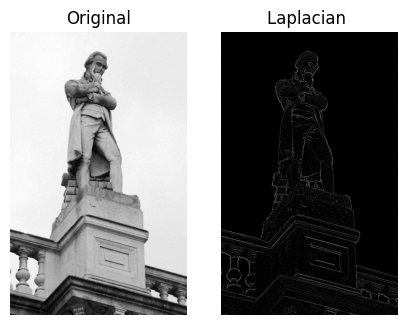

In [26]:
# Load file
file = 'Laplace.png'
image = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
(h, w) = image.shape


kernel = np.array([[1, 1, 1],[1, -8, 1],[1, 1, 1]])

img = cv2.filter2D(src=image, ddepth=-1,kernel=kernel)

fig, axes = plt.subplots(1, 2, figsize=(5, 10))

# Plot the Laplacian-convolved image using plt
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(img, cmap='gray')
axes[1].set_title('Laplacian ')
axes[1].axis('off')